In [10]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import geopandas as gpd

from Illinois_network import *

In [11]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

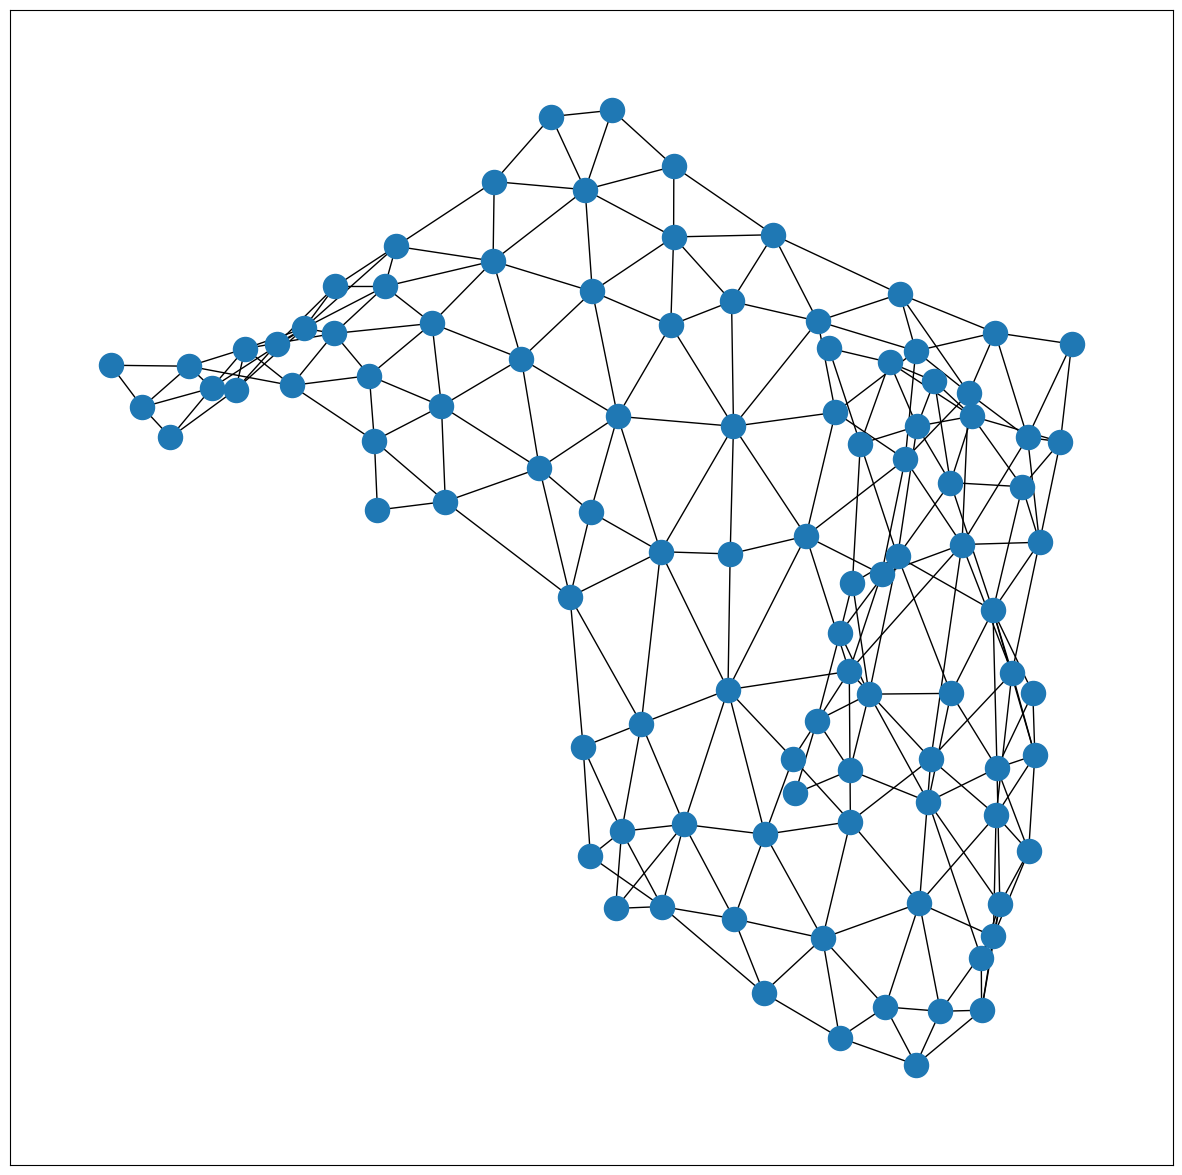

In [12]:
pos = nx.spring_layout(CG)
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx_nodes(CG, pos, ax=ax)
nx.draw_networkx_edges(CG, pos, ax=ax)
plt.show()

#### That Doesn't look like Illinois!

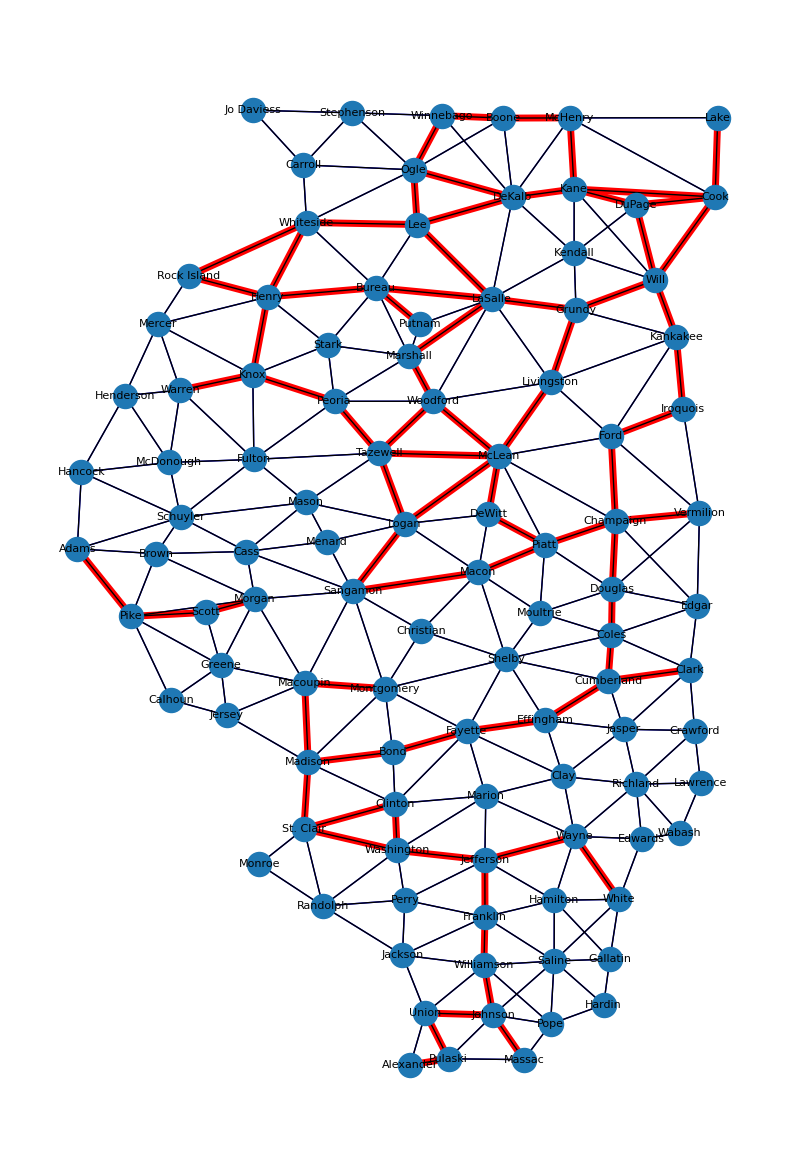

In [13]:
fig, ax = plt.subplots(figsize=(10, 15))

labels = {node: handler[node.name].name for node in CG.nodes()}
node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}


edge_colors = ['red' if CG[src][tgt]['rel'] == 'interstate' else 'blue' for src, tgt in CG.edges()]
edge_widths = [5 if CG[src][tgt]['rel'] == 'interstate' else 1 for src, tgt in CG.edges()]
nx.draw_networkx_edges(CG, pos=node_positions, edge_color=edge_colors, ax=ax, width=edge_widths)

nx.draw(CG, pos=node_positions, ax=ax)
nx.draw_networkx_labels(CG, pos=node_positions, labels=labels, font_size=8, ax=ax)
plt.show()

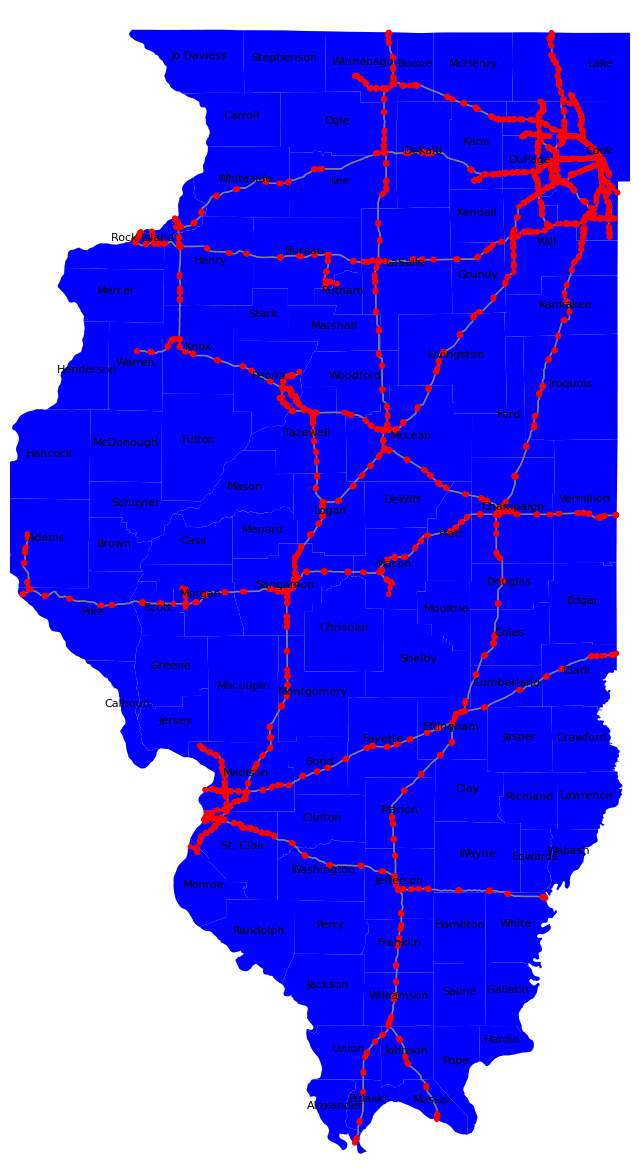

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
cgdf = gpd.GeoDataFrame({
    'name': [handler[key].name for key in handler],
    'geometry': [handler[key].geometry for key in handler]
})
cgdf.plot(ax=ax, color='blue')
for key, county in handler.items():
    ax.annotate(text=county.name, xy=(county.centroid.x, county.centroid.y),
                horizontalalignment='center', color='black', fontsize=8)


ox.plot_graph(highways, ax=ax, node_color='r', edge_color='gray')

In [42]:
cgdf

,name,geometry
0,Cook,"POLYGON ((-88.26364 42.06687, -88.26364 42.066..."
1,DuPage,"POLYGON ((-88.26290 41.98116, -88.26288 41.978..."
2,Kane,"POLYGON ((-88.60256 41.80659, -88.60220 41.785..."
3,Will,"POLYGON ((-88.26195 41.72465, -88.25998 41.661..."
4,Winnebago,"POLYGON ((-89.40206 42.50053, -89.40029 42.460..."
...,...,...
97,Henderson,"POLYGON ((-91.18531 40.63781, -91.16866 40.637..."
98,Calhoun,"POLYGON ((-90.93722 39.40047, -90.93705 39.400..."
99,Schuyler,"POLYGON ((-90.91174 40.10493, -90.85224 40.106..."
100,Gallatin,"POLYGON ((-88.37530 37.59954, -88.31790 37.599..."
